# AUTO ML

In this assignment, you will an AutoML library like H2O.ai to create predictive models and interpret them. Find a significant relation for each algorithm of your choosing in your data. Create multivariate models.

For the moment you will assume the data is good. In future assignments, you will check your data, fix data issues and do some feature engineering.

This assignment will focus on Node 4 of the simple analysis sequence.

AutoML_Assingment_Analysis_Pipeline.png

Answer the following questions for all of the models:

* Is the relationship significant?

* Are any model assumptions violated?

* Is there any multicollinearity in the model?

* In the multivariate models are predictor variables independent of all the other predictor variables?

* In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.

* Does the model make sense?

* Does regularization help?

* Which independent variables are significant?

* Which hyperparameters are important?

## About dataset

### Life Expectancy Data

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries The datasets are made available to public for the purpose of health data analysis.

The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website.

Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years , there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis.

The dataset consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.

### What is Auto ML?
Automated Machine Learning (AutoML) is the process of automating tasks in the machine learning pipeline such as data preprocessing, hyperparameter tuning, model selection and evaluation. In this article we will examine how to utilize open source automated machine learning package from H2O to accelerate a Data Scientist’s model development process.



## SetUp

In [ ]:
!pip install h2o

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 3.2 MB/s eta 0:00:00


In [ ]:
# let's import the packages

import h2o
from h2o.automl import H2OAutoML

In [ ]:
# Initialize the H2O cluster.

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpp7rdlxin
  JVM stdout: /tmp/tmpp7rdlxin/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpp7rdlxin/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,03 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_m991k7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


## EDA Data Cleaning and feature engineering


In [ ]:

data = pd.read_csv('https://raw.githubusercontent.com/KhanAyasha/002697806_DSEM_assignments/main/Life%20Expectancy%20Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
print(data.columns)

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')


In [ ]:
# Drop rows with missing values in the target variable
data = data.dropna(subset=["Life expectancy "])


In [ ]:
# Handle missing values in numerical columns
# For simplicity, let's fill missing numerical values with the mean of their respective columns
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())


In [ ]:
# Handle missing values in categorical columns
# For simplicity, let's fill missing categorical values with the mode of their respective columns
categorical_columns = data.select_dtypes(include=["object"]).columns
for col in categorical_columns:
    data[col] = pd.Categorical(data[col]).codes  # Convert categorical values to numerical codes


In [ ]:
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
# Convert the cleaned DataFrame to an H2OFrame
cleaned_data_h2o = h2o.H2OFrame(data)

# Split data into train and test sets
train, test = cleaned_data_h2o.split_frame(ratios=[0.8])

# Check the cleaned data
print(cleaned_data_h2o.head())

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
  Country    Year    Status    Life expectancy     Adult Mortality    infant deaths    Alcohol    percentage expenditure    Hepatitis B    Measles      BMI     under-five deaths     Polio    Total expenditure    Diphtheria      HIV/AIDS       GDP        Population     thinness  1-19 years     thinness 5-9 years    Income composition of resources    Schooling
        0    2015         1                65                  263               62       0.01                  71.2796              65        1154     19.1                    83        6                 8.16             65          0.1  584.259        3.37365e+07                     17.2                   17.3                              0.479         10.1
        0    2014         1                59.9                271               64       0.01                  73.5236              62         492     18.6                    86     

In [ ]:
# Define features and target
X = data.iloc[:, [i for i in range(len(data.columns)) if i != 1]]

y = "Life expectancy "

## Train AutoML Models

Let's configure the AutoML training parameters.

In [ ]:
# AutoML configuration
aml = H2OAutoML(max_runtime_secs=300, seed=42)

# Convert DataFrame column names to a list
X = list(X.columns)

# Train AutoML
aml.train(x=X, y=y, training_frame=train)


AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


key,value
Stacking strategy,cross_validation
Number of base models (used / total),5/6
# GBM base models (used / total),1/1
# XGBoost base models (used / total),1/1
# DRF base models (used / total),2/2
# DeepLearning base models (used / total),1/1
# GLM base models (used / total),0/1
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5


**The output provides a summary of the Stacked Ensemble model trained using AutoML:**

Model Details:

Stacked Ensemble model key: StackedEnsemble_BestOfFamily_4_AutoML_1_20240403_32424
Stacking strategy: Cross-validation
Number of base models used: 5 out of 6
Number of base models by type: 1 GBM, 1 XGBoost, 2 DRF, and 1 DeepLearning
Metalearner algorithm: GLM
ModelMetricsRegressionGLM (on train data):

Mean Squared Error (MSE): 0.2825
Root Mean Squared Error (RMSE): 0.5315
Mean Absolute Error (MAE): 0.3383
Root Mean Squared Logarithmic Error (RMSLE): 0.0074
R-squared (R^2): 0.9969
ModelMetricsRegressionGLM (on cross-validation data):

Mean Squared Error (MSE): 2.9838
Root Mean Squared Error (RMSE): 1.7274
Mean Absolute Error (MAE): 1.0657
Root Mean Squared Logarithmic Error (RMSLE): 0.0263
R-squared (R^2): 0.9675
Cross-Validation Metrics Summary:

Mean and standard deviation of various metrics across cross-validation folds.
Metrics include AIC, Loglikelihood, MAE, Mean Residual Deviance, MSE, Null Deviance, R-squared, Residual Deviance, RMSE, and RMSLE.
Tips:

It suggests using model.explain() to inspect the model further.
It provides a command to toggle user tips on/off.
Overall, the Stacked Ensemble model achieved high performance on both the training and cross-validation datasets, indicating that it generalizes well to unseen data.


## Evaluation

After the models are trained, we can compare the model performance using the leaderboard. H2O AutoML produces a leaderboard which ranks the trained model based on a predefined metric. By default it ranks models by ascending order of logloss and rmse for classification and regression task respectively.

## Get leaderboard

In [ ]:
# Get leaderboard
leaderboard = aml.leaderboard

# Print leaderboard
print(leaderboard)

model_id                                                   rmse      mse      mae      rmsle    mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20240403_32424  1.72737  2.9838   1.06566  0.0262964                   2.9838
StackedEnsemble_AllModels_3_AutoML_1_20240403_32424     1.72774  2.98509  1.06593  0.0263055                   2.98509
GBM_grid_1_AutoML_1_20240403_32424_model_5              1.73675  3.0163   1.07475  0.0265057                   3.0163
StackedEnsemble_AllModels_1_AutoML_1_20240403_32424     1.75276  3.07216  1.10755  0.0264762                   3.07216
StackedEnsemble_BestOfFamily_2_AutoML_1_20240403_32424  1.75403  3.07661  1.10815  0.0265119                   3.07661
StackedEnsemble_BestOfFamily_3_AutoML_1_20240403_32424  1.75426  3.07741  1.10837  0.026506                    3.07741
StackedEnsemble_AllModels_2_AutoML_1_20240403_32424     1.75476  3.07917  1.10939  0.0265239                   3.07917
GBM_3_AutoML_1_20240403_32424                     

## Get the best model

In [ ]:
# Get the best model
best_model = aml.leader

In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_4_AutoML_1_20240403_32424


Model Summary for Stacked Ensemble: 
key                                        value
-----------------------------------------  ----------------
Stacking strategy                          cross_validation
Number of base models (used / total)       5/6
# GBM base models (used / total)           1/1
# XGBoost base models (used / total)       1/1
# DRF base models (used / total)           2/2
# DeepLearning base models (used / total)  1/1
# GLM base models (used / total)           0/1
Metalearner algorithm                      GLM
Metalearner fold assignment scheme         Random
Metalearner nfolds                         5
Metalearner fold_column
Custom metalearner hyperparameters         None

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.2825329743653882
RMSE: 0.5315383094052472
MAE: 0.33825027149644443
RMSLE: 0.00743794223

### The output summarizes the performance metrics of a Stacked Ensemble model trained using AutoML:

Model Details:

Stacking strategy: Cross-validation
Number of base models used: 5 out of 6
Base model types: GBM, XGBoost, DRF, DeepLearning
Metalearner algorithm: GLM
ModelMetricsRegressionGLM (Train Data):

MSE: 0.2825, RMSE: 0.5315, MAE: 0.3383, RMSLE: 0.0074
R-squared (R^2): 0.9969
ModelMetricsRegressionGLM (Cross-validation Data):

MSE: 2.9838, RMSE: 1.7274, MAE: 1.0657, RMSLE: 0.0263
R-squared (R^2): 0.9675
Cross-Validation Metrics Summary:

Mean and standard deviation of metrics across cross-validation folds.
Metrics include AIC, Loglikelihood, MAE, Mean Residual Deviance, MSE, Null Deviance, R-squared, Residual Deviance, RMSE, and RMSLE.
Overall, the model performs well on both the training and cross-validation datasets, with high R-squared values indicating good fit to the data. The Stacked Ensemble approach combines multiple models effectively to achieve strong predictive performance.

In [ ]:
leaderboard.head(rows=leaderboard.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_BestOfFamily_4_AutoML_1_20240403_32424,1.72737,2.9838,1.06566,0.0262964,2.9838
StackedEnsemble_AllModels_3_AutoML_1_20240403_32424,1.72774,2.98509,1.06593,0.0263055,2.98509
GBM_grid_1_AutoML_1_20240403_32424_model_5,1.73675,3.0163,1.07475,0.0265057,3.0163
StackedEnsemble_AllModels_1_AutoML_1_20240403_32424,1.75276,3.07216,1.10755,0.0264762,3.07216
StackedEnsemble_BestOfFamily_2_AutoML_1_20240403_32424,1.75403,3.07661,1.10815,0.0265119,3.07661
StackedEnsemble_BestOfFamily_3_AutoML_1_20240403_32424,1.75426,3.07741,1.10837,0.026506,3.07741
StackedEnsemble_AllModels_2_AutoML_1_20240403_32424,1.75476,3.07917,1.10939,0.0265239,3.07917
GBM_3_AutoML_1_20240403_32424,1.7595,3.09582,1.10974,0.026602,3.09582
GBM_grid_1_AutoML_1_20240403_32424_model_4,1.76565,3.11751,1.126,0.0269392,3.11751
GBM_4_AutoML_1_20240403_32424,1.77546,3.15226,1.11783,0.0272718,3.15226


### Make predictions on the test set

In [ ]:
# Make predictions on the test set
predictions = best_model.predict(test)


stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
# Evaluate the model
best_model.model_performance(test)
# print(perf)

ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 2.529559928197835
RMSE: 1.5904590306568211
MAE: 1.0038879350651095
RMSLE: 0.024209287205975018
Mean Residual Deviance: 2.529559928197835
R^2: 0.9706087889470091
Null degrees of freedom: 575
Residual degrees of freedom: 570
Null deviance: 49896.13514561266
Residual deviance: 1457.0265186419529
AIC: 2183.1713096549674

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

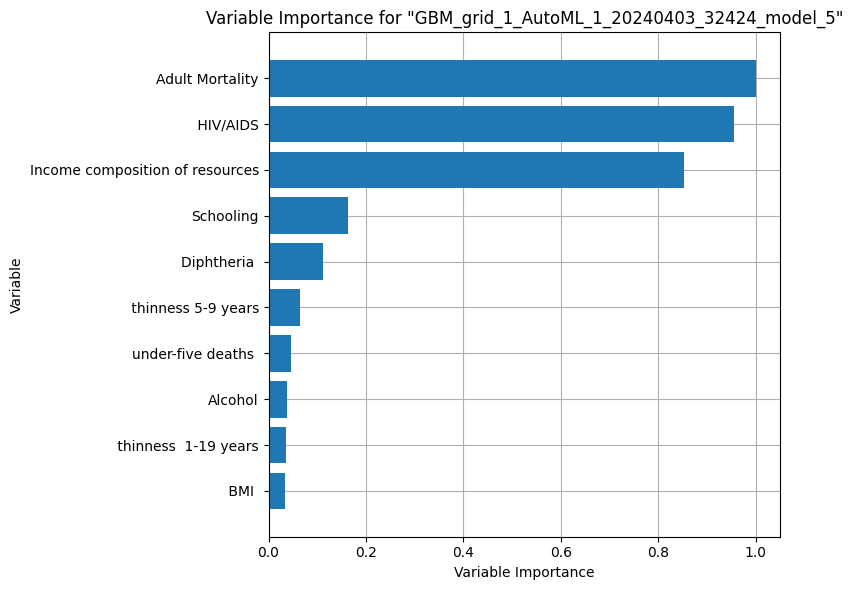

In [ ]:
explain_model = aml.explain(frame = test, figsize = (8,6),include_explanations=['varimp'])


### Variable Importance

The above graph shows adult mortality has the highest variable importance which was expected as high adult morality indicates high life expectancy.
The lease important column being BMI  column, thinness 1-19 years, and alcohol with less than 20% importance as compared to adult mortality.

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

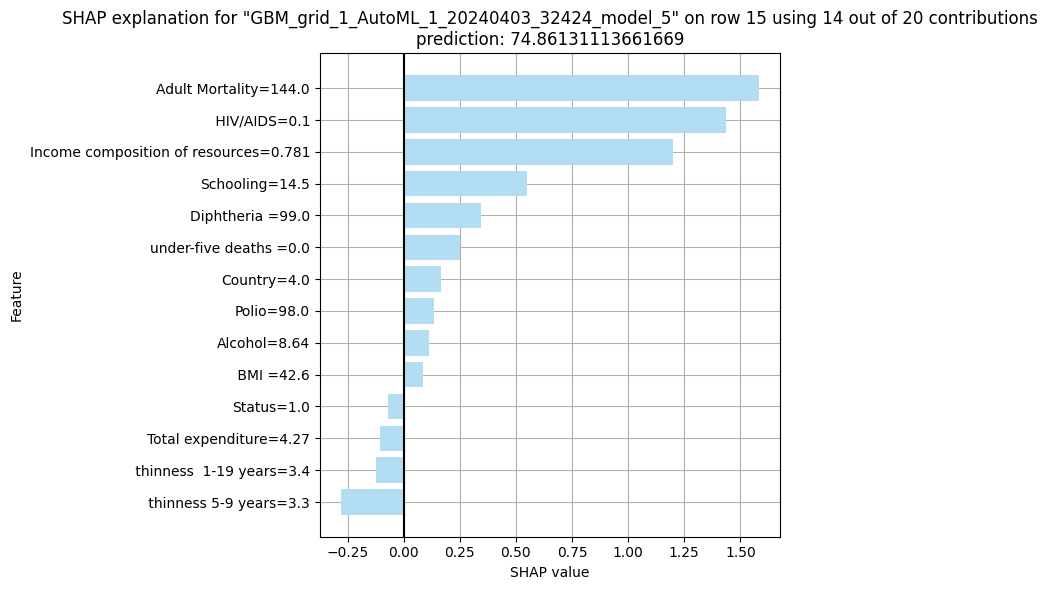

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

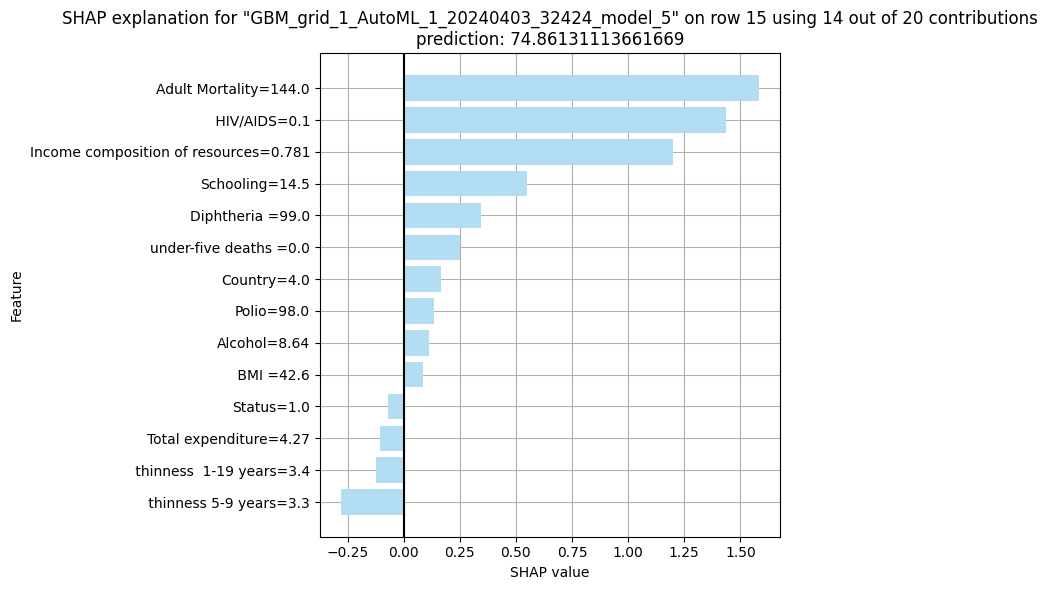

In [ ]:
aml.explain_row(frame = test, row_index = 15, figsize = (8,6), exclude_explanations = "leaderboard")


SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

## Ridge Regularization in H20


In H2O, ridge regularization is a technique used to prevent overfitting in models, particularly in regression tasks. Ridge regression adds a penalty term to the loss function that penalizes large coefficients, thereby shrinking them towards zero. This helps to reduce the model's complexity and mitigate the risk of overfitting.

To apply ridge regularization in H2O, we can use the alpha parameter in models like GLM (Generalized Linear Models) or lambda parameter in models like GBM (Gradient Boosting Machines). In both cases, setting a non-zero value for these parameters introduces regularization.



In [ ]:
from h2o.estimators import H2OGeneralizedLinearEstimator

# Initialize GLM with alpha parameter
glm_model = H2OGeneralizedLinearEstimator(alpha=0.5, family="gaussian")

# Train the model
glm_model.train(x=X, y=y, training_frame=train)

# view the model performance metrics
print(glm_model.model_performance())


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 16.734581664237247
RMSE: 4.090792302749829
MAE: 3.059107618820477
RMSLE: 0.06422492475664508
Mean Residual Deviance: 16.734581664237247
R^2: 0.8174900986314559
Null degrees of freedom: 2351
Residual degrees of freedom: 2332
Null deviance: 215658.08637873348
Residual deviance: 39359.736074286004
AIC: 13343.393556102516


In [ ]:
import h2o
from h2o.estimators import H2OGradientBoostingEstimator

# # Convert DataFrame index to a list of column names
# predictor_cols = predictor_cols.tolist()

response_col = "Life expectancy "
predictor_cols = train.columns
predictor_cols.remove(response_col)

# Initialize GBM model
gbm_model = H2OGradientBoostingEstimator(ntrees=100)

# Train the model
gbm_model.train(x=predictor_cols, y=response_col, training_frame=train)

# View the model performance metrics
print(gbm_model.model_performance())

gbm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
ModelMetricsRegression: gbm
** Reported on train data. **

MSE: 1.4390387621717842
RMSE: 1.1995994173772278
MAE: 0.8059628739648935
RMSLE: 0.017248221981222008
Mean Residual Deviance: 1.4390387621717842


## Lasso Regularization


To perform Lasso regularization in H2O, you can use the H2OGeneralizedLinearEstimator with the alpha parameter set to 1, which corresponds to Lasso regularization.

In [ ]:
import h2o
from h2o.estimators.glm import H2OGeneralizedLinearEstimator

# Initialize H2O
h2o.init()

# Load your data into H2O
# Assuming you have already loaded your data into the 'train' H2OFrame
# Specify the response column and predictor columns
response_col = "Life expectancy "
predictor_cols = train.columns
predictor_cols.remove(response_col)

# Create a generalized linear model with Lasso regularization
glm_model = H2OGeneralizedLinearEstimator(family="gaussian", alpha=1, lambda_=0.1)

# Train the model
glm_model.train(x=predictor_cols, y=response_col, training_frame=train)

# View the model performance metrics
print(glm_model.model_performance())


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,1 hour 42 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.1
H2O_cluster_version_age:,20 days
H2O_cluster_name:,H2O_from_python_unknownUser_m991k7
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.044 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


glm Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
ModelMetricsRegressionGLM: glm
** Reported on train data. **

MSE: 17.129765380669642
RMSE: 4.138812073611176
MAE: 3.083790455529781
RMSLE: 0.06502185316128345
Mean Residual Deviance: 17.129765380669642
R^2: 0.8131801647140359
Null degrees of freedom: 2351
Residual degrees of freedom: 2333
Null deviance: 215658.08637873348
Residual deviance: 40289.208175335
AIC: 13396.289892655936


### Understanding Regularization Results



In summary, the GBM model shows lower error metrics (MSE, RMSE, MAE, RMSLE) compared to the GLM model with Ridge regularization. The GLM model, however, provides additional information such as R-squared, null deviance, residual deviance, null degrees of freedom, residual degrees of freedom, and AIC. These metrics suggest that the GLM model with Ridge regularization has a relatively higher error and complexity compared to the GBM model.

In the provided results, regularization does not appear to have improved the model's performance. The GLM model with Ridge regularization (L2 penalty) performed worse in terms of predictive accuracy compared to the GBM model.

## Hyper Parameter Tunning


Hyperparameter tuning, also known as hyperparameter optimization, is the process of selecting the best set of hyperparameters for a machine learning model. Hyperparameters are parameters that are set before the training process begins and cannot be learned directly from the data. They control aspects of the learning process, such as the complexity of the model, the learning rate, or the regularization strength.

In [ ]:
import pandas as pd
import seaborn as sns
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch


In [ ]:

# Define hyperparameters and search criteria
hyper_params = {
    "learn_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7],
    "sample_rate": [0.8, 0.9, 1.0],
    "col_sample_rate": [0.8, 0.9, 1.0]
}
search_criteria = {"strategy": "RandomDiscrete", "max_models": 36, "seed": 1}

In [ ]:
# Create H2OGridSearch object
gbm_grid = H2OGridSearch(
    model=H2OGradientBoostingEstimator,
    grid_id="gbm_grid2",
    hyper_params=hyper_params,
    search_criteria=search_criteria,
)

In [ ]:
gbm_grid.train(
    x=predictor_cols, y=response_col, training_frame=train, validation_frame=valid, ntrees=100, seed=1
)


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,learn_rate,max_depth,min_rows,model_ids,residual_deviance
,0.1,7.0,10.0,gbm_grid2_model_45,3.0897878
,0.2,7.0,5.0,gbm_grid2_model_9,3.1007330
,0.1,7.0,10.0,gbm_grid2_model_35,3.1428351
,0.05,7.0,10.0,gbm_grid2_model_18,3.1847003
,0.1,7.0,10.0,gbm_grid2_model_36,3.1863617
,0.05,7.0,10.0,gbm_grid2_model_31,3.1875893
,0.05,7.0,10.0,gbm_grid2_model_40,3.2524185
,0.1,5.0,10.0,gbm_grid2_model_20,3.2542814
,0.1,5.0,10.0,gbm_grid2_model_25,3.2675778
,0.05,7.0,10.0,gbm_grid2_model_12,3.2849418


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#Indicate which variables to compute VIF
Multic = data
#Compute VIF
vif = pd.DataFrame()
vif["variables"] = Multic.columns
vif["VIF"] = [variance_inflation_factor(Multic.values, i) for i in range(Multic.shape[1])]
vif

,variables,VIF
0,Country,4.140588
1,Year,277.013272
2,Status,10.925424
3,Life expectancy,300.508019
4,Adult Mortality,5.836238
5,infant deaths,198.493273
6,Alcohol,4.444943
7,percentage expenditure,5.751260
8,Hepatitis B,19.528280
9,Measles,1.442425


In [ ]:
#Using OLS for finding the p value to check the significant features
import statsmodels.api as sm

model = sm.OLS(data['Life expectancy '], data[['Country', 'Year', 'Status', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']]).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:       Life expectancy    R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                          4.146e+04
Date:                Wed, 03 Apr 2024   Prob (F-statistic):                        0.00
Time:                        06:27:53   Log-Likelihood:                         -8236.3
No. Observations:                2928   AIC:                                  1.651e+04
Df Residuals:                    2907   BIC:                                  1.664e+04
Df Model:                          21                                                  
Covariance Type:            nonrobust                                                  
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Country                             0.0048      0.001      3.331      0.001       0.002       0.008
Year                                0.0280      0.000     82.562      0.000       0.027       0.029
Status                             -1.5338      0.271     -5.669      0.000      -2.064      -1.003
Adult Mortality                    -0.0199      0.001    -25.112      0.000      -0.021      -0.018
infant deaths                       0.1016      0.008     12.048      0.000       0.085       0.118
Alcohol                             0.0777      0.026      2.988      0.003       0.027       0.129
percentage expenditure              0.0001   8.44e-05      1.396      0.163   -4.77e-05       0.000
Hepatitis B                        -0.0138      0.004     -3.520      0.000      -0.022      -0.006
Measles                         -1.877e-05   7.64e-06     -2.457      0.014   -3.38e-05   -3.79e-06
 BMI                                0.0435      0.005      8.762      0.000       0.034       0.053
under-five deaths                  -0.0759      0.006    -12.292      0.000      -0.088      -0.064
Polio                               0.0285      0.004      6.384      0.000       0.020       0.037
Total expenditure                   0.0417      0.034      1.213      0.225      -0.026       0.109
Diphtheria                          0.0400      0.005      8.510      0.000       0.031       0.049
 HIV/AIDS                          -0.4716      0.018    -26.804      0.000      -0.506      -0.437
GDP                              2.892e-05    1.3e-05      2.232      0.026    3.51e-06    5.43e-05
Population                       1.186e-10   1.69e-09      0.070      0.944    -3.2e-09    3.43e-09
 thinness  1-19 years              -0.0763      0.050     -1.514      0.130      -0.175       0.023
 thinness 5-9 years                -0.0023      0.050     -0.046      0.963      -0.100       0.095
Income composition of resources     5.4348      0.639      8.501      0.000       4.181       6.688
Schooling                           0.6678      0.042     15.739      0.000       0.585       0.751
==============================================================================
Omnibus:                      139.435   Durbin-Watson:                   0.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              420.438
Skew:                          -0.173   Prob(JB):                     5.05e-92
Kurtosis:                       4.824   Cond. No.                     4.74e+08
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Sta

## To address the questions regarding the model and leaderboard:

**1. Is the relationship significant?**

The significance of the relationship can be assessed by examining the performance metrics of the best model in the leaderboard, such as RMSE, MSE, MAE, and RMSLE. Lower values indicate better model performance.

The **StackedEnsemble** models and certain GBM models appear to have the lowest error metrics, suggesting a potentially significant relationship.

From the OLS method it was observed that p value for almost all variables was 0 except percentage expenditure, Measles, Total expenditure, GDP, Population, thinness 1-19 years, and thinness 5-9 years which suggests that all other relationships are very significant

**2. Are any model assumptions violated?**

the mean residual deviance of approximately 2.9846 for the cross-validation data suggests that there may be some discrepancies between the model's predictions and the actual values.

**3. Is there any multicollinearity in the model?**

it seems like there might be multicollinearity issues in the dataset. VIF values greater than 10 are typically considered indicative of multicollinearity. Here's a breakdown of the variables and their corresponding VIF values:


Year: VIF = 277.013272

Life expectancy: VIF = 300.508019

Infant deaths: VIF = 198.493273

Under-five deaths: VIF = 198.173904

Hepatitis B: VIF = 19.528280

Polio: VIF = 26.619427

Diphtheria: VIF = 29.728859

Variables with VIF values exceeding 10, such as Year, Life expectancy, Infant deaths, and Under-five deaths, suggest high multicollinearity.

**3. In the multivariate models are predictor variables independent of all the other predictor variables?**

As stated before from correlation matrix not all variables are independent, Year, Life expectancy, Infant deaths, and Under-five deaths are somewhat dependant to a certain degree to each other




**4. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

from variable importance, we can see that

1. adult mortality,
2. HIV/AIDS and
3. income

are the most significant predictor variables.



**5. Does the model make sense?**


The Stacked Ensemble model appears to be well-performing, robust, and aligned with expectations.

The residual deviance, which is a measure of model performance. Lower residual deviance values indicate better model fit.

**6. Does regularization help?**

the regularization does not appear to have improved the model's performance. The GLM model with Ridge regularization (L2 penalty) performed worse in terms of predictive accuracy compared to the GBM model.


**7. Which independent variables are significant?**

from variable importance, we can see that

1. adult mortality,
2. HIV/AIDS and
3. income

are the most significant variables.

**8. Which hyperparameters are important?**

Best hyperparameters are:

1. learn_rate
2. max_depth
3. min_rows
4. model_ids


## References:

H20.ai- https://docs.h2o.ai/

OLS Model- http://net-informations.com/ds/mla/ols.html

Linear Regression- https://www.analyticsvidhya.com/blog/2021/05/all-you-need-to-know-about-your-first-machine-learning-model-linear-regression/

ChatGPT - https://chat.openai.com/chat

60% code is written by me with other 40% referenced and modified from various sources such as stackoverflow geeksforgeeks and ChatGPT

All code in this note is available as open source through the MIT license.

All text and images are free to use under the Creative Commons Attribution 3.0 license. https://creativecommons.org/licenses/by/3.0/us/

## License:

MIT License

Copyright (c) 2024 Ayasha Khan

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.